<a href="https://colab.research.google.com/github/JudsonLima/computationalImaging/blob/master/HW5_JudsonLimaFinalQ1-2_MultiplaneMissing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging HW 5

Judson Lima

OPTI 556, Fall 2023

## Holography and Phase Retrival

In this workbook, simumlated holographic recording and reconstruction was completed for various objects. Both off-axis, more commonly used, and in-line holograms are documented.

Reference free reconstruction was attempted as well using phase retrival and a comparison was made to the holographic methods using the same images.


Libraries

In [9]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage
import os
from matplotlib import animation, rc
from skimage import io
from skimage import transform
from skimage import filters
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
#from google.colab import files
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from keras.datasets import mnist

import warnings
warnings.filterwarnings('ignore')


## Used functions

Angular Spectrum Propagation, a numerical modeling using a Fourier distribution with a transfer function from the $z = 0$ plane to the $z = d$ plane.


Load mnist data set as example images


In [2]:
def g(f,d,lam):
#
# calculate the diffracted field for the 2d image f propagated a distance d with wavelength relative to the pixel pitch lam
# d is in units of wavelengths, lam is the ratio of the wavelength to the sampling period. We assume lam<< 1
#
  zPad=np.int(np.abs(d*lam)/4)
  inF=np.zeros(np.add(f.shape,[zPad,zPad])).astype('complex128')
  inF[np.int(inF.shape[0]/2-f.shape[0]/2):np.int(inF.shape[0]/2+f.shape[0]/2),np.int(inF.shape[0]/2-f.shape[0]/2):np.int(inF.shape[0]/2+f.shape[0]/2)]=f
  urange=np.linspace(-lam/2,lam/2,inF.shape[0])
  u,v = np.meshgrid(urange,urange)
  g=np.fft.ifft2(np.fft.fft2(inF)*np.fft.fftshift(np.exp(1j *2* np.pi *d*np.sqrt( 1 - u**2 - v**2))))
  return g

Load mnist data set as example images

In [3]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

11490434/11490434 [==============================] - 0s 0us/step


##Leith-Upatneiks holography

Leith-Upatneiks, or off-axis, holography is the most common approach to image-based sensing. A simulated approach to propagation of a signal a length $d$ and then interference of the diffracted field with a reference signal $R e^{i2\pi \sin \theta \frac{x}{\lambda}}$ is used in this section. Which is then back propogated. It is assumed that the original object field is a real-valued magnitude.




Text(0, 0.5, 'wavelengths')

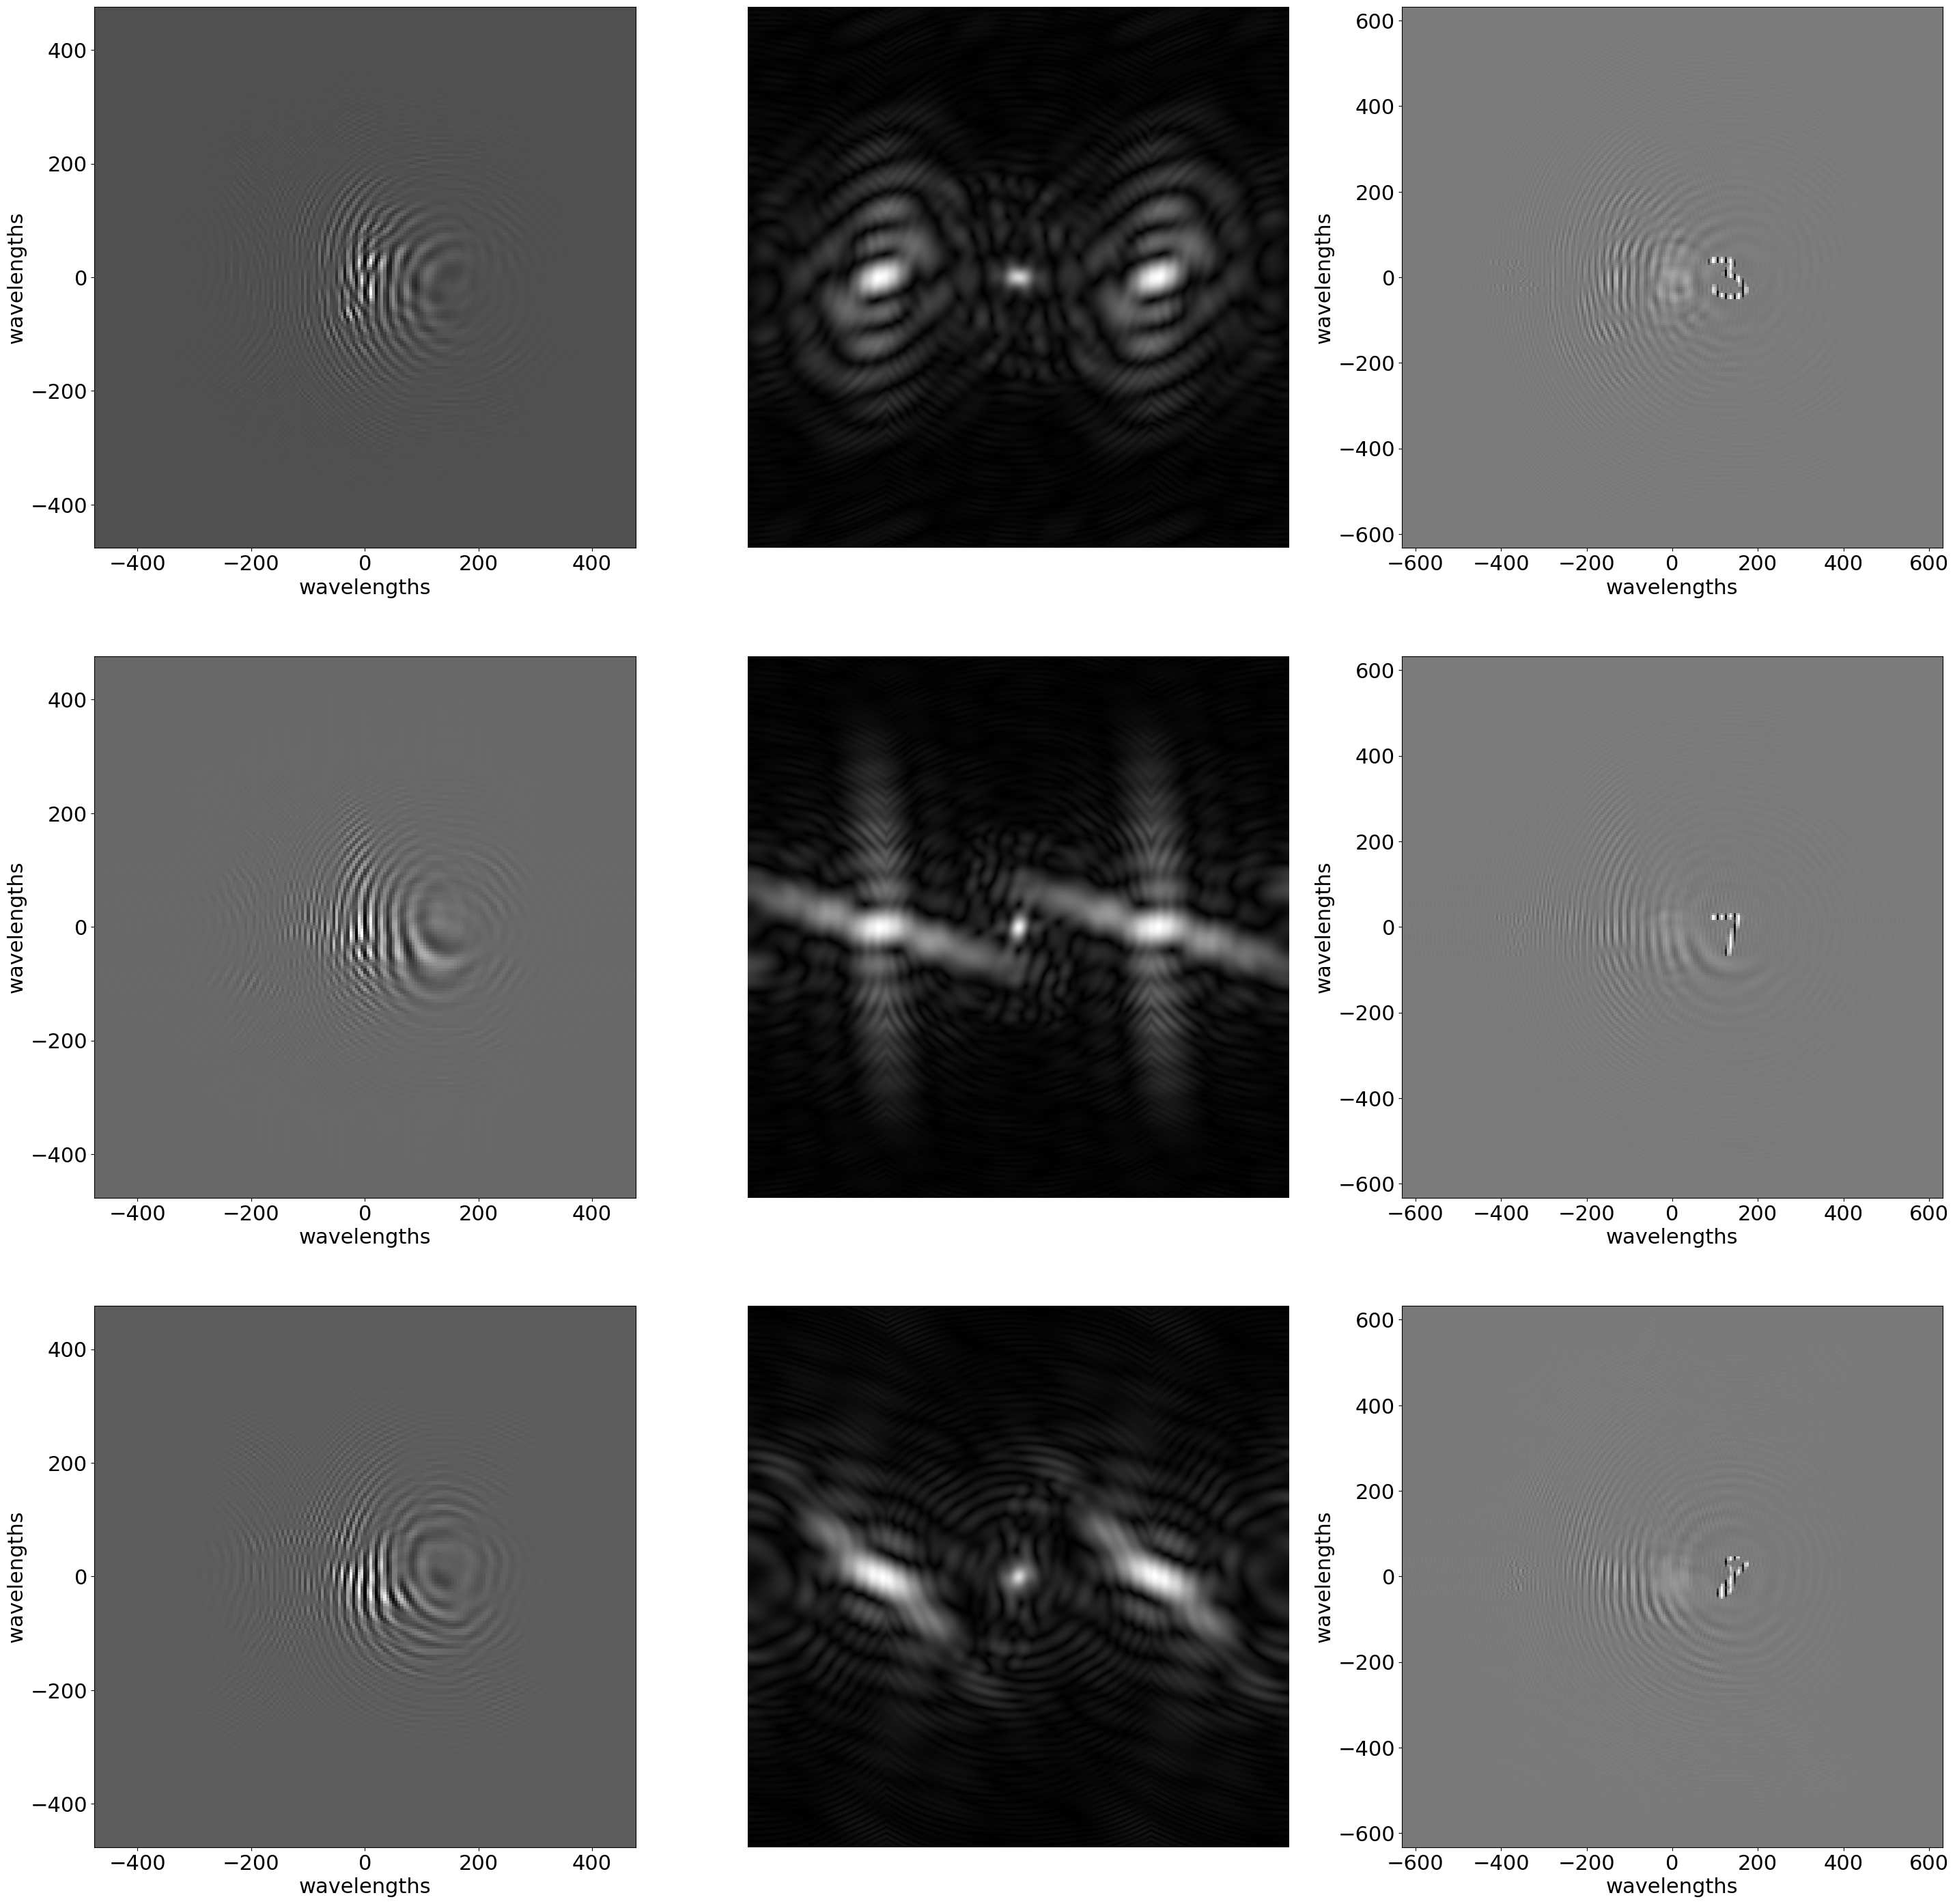

In [46]:
# diffracted field
plt.rcParams['figure.figsize'] = [35, 35]
plt.rcParams.update({'font.size': 22})
r=1
N=512
theta=np.pi/25
lam=.1 # ratio of wavelength to the sampling period
d=10000 # in units of wavelegnths
f=np.zeros([N,N]).astype('complex128')
# insert the mnist image in the center of the field
f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=x_test[1840,:,:]
q=g(f,d,lam)
xrange=q.shape[0]/(lam*2)
xR=np.linspace(-xrange,xrange,q.shape[0])
xx, yy= np.meshgrid(xR,xR)
holo=np.abs(q +r*np.exp(2*np.pi*1j*xx*np.sin(theta)))**2
plt.subplot(3,3,1)
holV=(holo-r**2)
ss=holV.shape[0]
plt.imshow(holV[np.int(3*ss/8):np.int(5*ss/8),np.int(3*ss/8):np.int(5*ss/8)],extent=[-xrange/8,xrange/8,-xrange/8,xrange/8 ],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')
plt.subplot(3,3,2)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(holo-r**2))),cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,3,3)
recon=np.abs(g(holo,-d,lam))
xrange=recon.shape[0]/(lam*2)
ss=recon.shape[0]
plt.imshow(recon[np.int(3*ss/8):np.int(5*ss/8),np.int(3*ss/8):np.int(5*ss/8)],extent=[-xrange/8,xrange/8,-xrange/8,xrange/8],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')

# insert the mnist image in the center of the field
f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=x_test[1919,:,:]
q2=g(f,d,lam)
xrange=q2.shape[0]/(lam*2)
xR=np.linspace(-xrange,xrange,q2.shape[0])
xx, yy= np.meshgrid(xR,xR)
holo2=np.abs(q2 +r*np.exp(2*np.pi*1j*xx*np.sin(theta)))**2
plt.subplot(3,3,4)
holV=(holo2-r**2)
ss=holV.shape[0]
plt.imshow(holV[np.int(3*ss/8):np.int(5*ss/8),np.int(3*ss/8):np.int(5*ss/8)],extent=[-xrange/8,xrange/8,-xrange/8,xrange/8 ],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')
plt.subplot(3,3,5)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(holo2-r**2))),cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,3,6)
recon=np.abs(g(holo2,-d,lam))
xrange=recon.shape[0]/(lam*2)
ss=recon.shape[0]
plt.imshow(recon[np.int(3*ss/8):np.int(5*ss/8),np.int(3*ss/8):np.int(5*ss/8)],extent=[-xrange/8,xrange/8,-xrange/8,xrange/8],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')

# insert the mnist image in the center of the field
f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=x_test[2598,:,:]
q3=g(f,d,lam)
xrange=q3.shape[0]/(lam*2)
xR=np.linspace(-xrange,xrange,q3.shape[0])
xx, yy= np.meshgrid(xR,xR)
holo3=np.abs(q3 +r*np.exp(2*np.pi*1j*xx*np.sin(theta)))**2
plt.subplot(3,3,7)
holV=(holo3-r**2)
ss=holV.shape[0]
plt.imshow(holV[np.int(3*ss/8):np.int(5*ss/8),np.int(3*ss/8):np.int(5*ss/8)],extent=[-xrange/8,xrange/8,-xrange/8,xrange/8 ],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')
plt.subplot(3,3,8)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(holo3-r**2))),cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,3,9)
recon=np.abs(g(holo3,-d,lam))
xrange=recon.shape[0]/(lam*2)
ss=recon.shape[0]
plt.imshow(recon[np.int(3*ss/8):np.int(5*ss/8),np.int(3*ss/8):np.int(5*ss/8)],extent=[-xrange/8,xrange/8,-xrange/8,xrange/8],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')

(-0.5, 27.5, 27.5, -0.5)

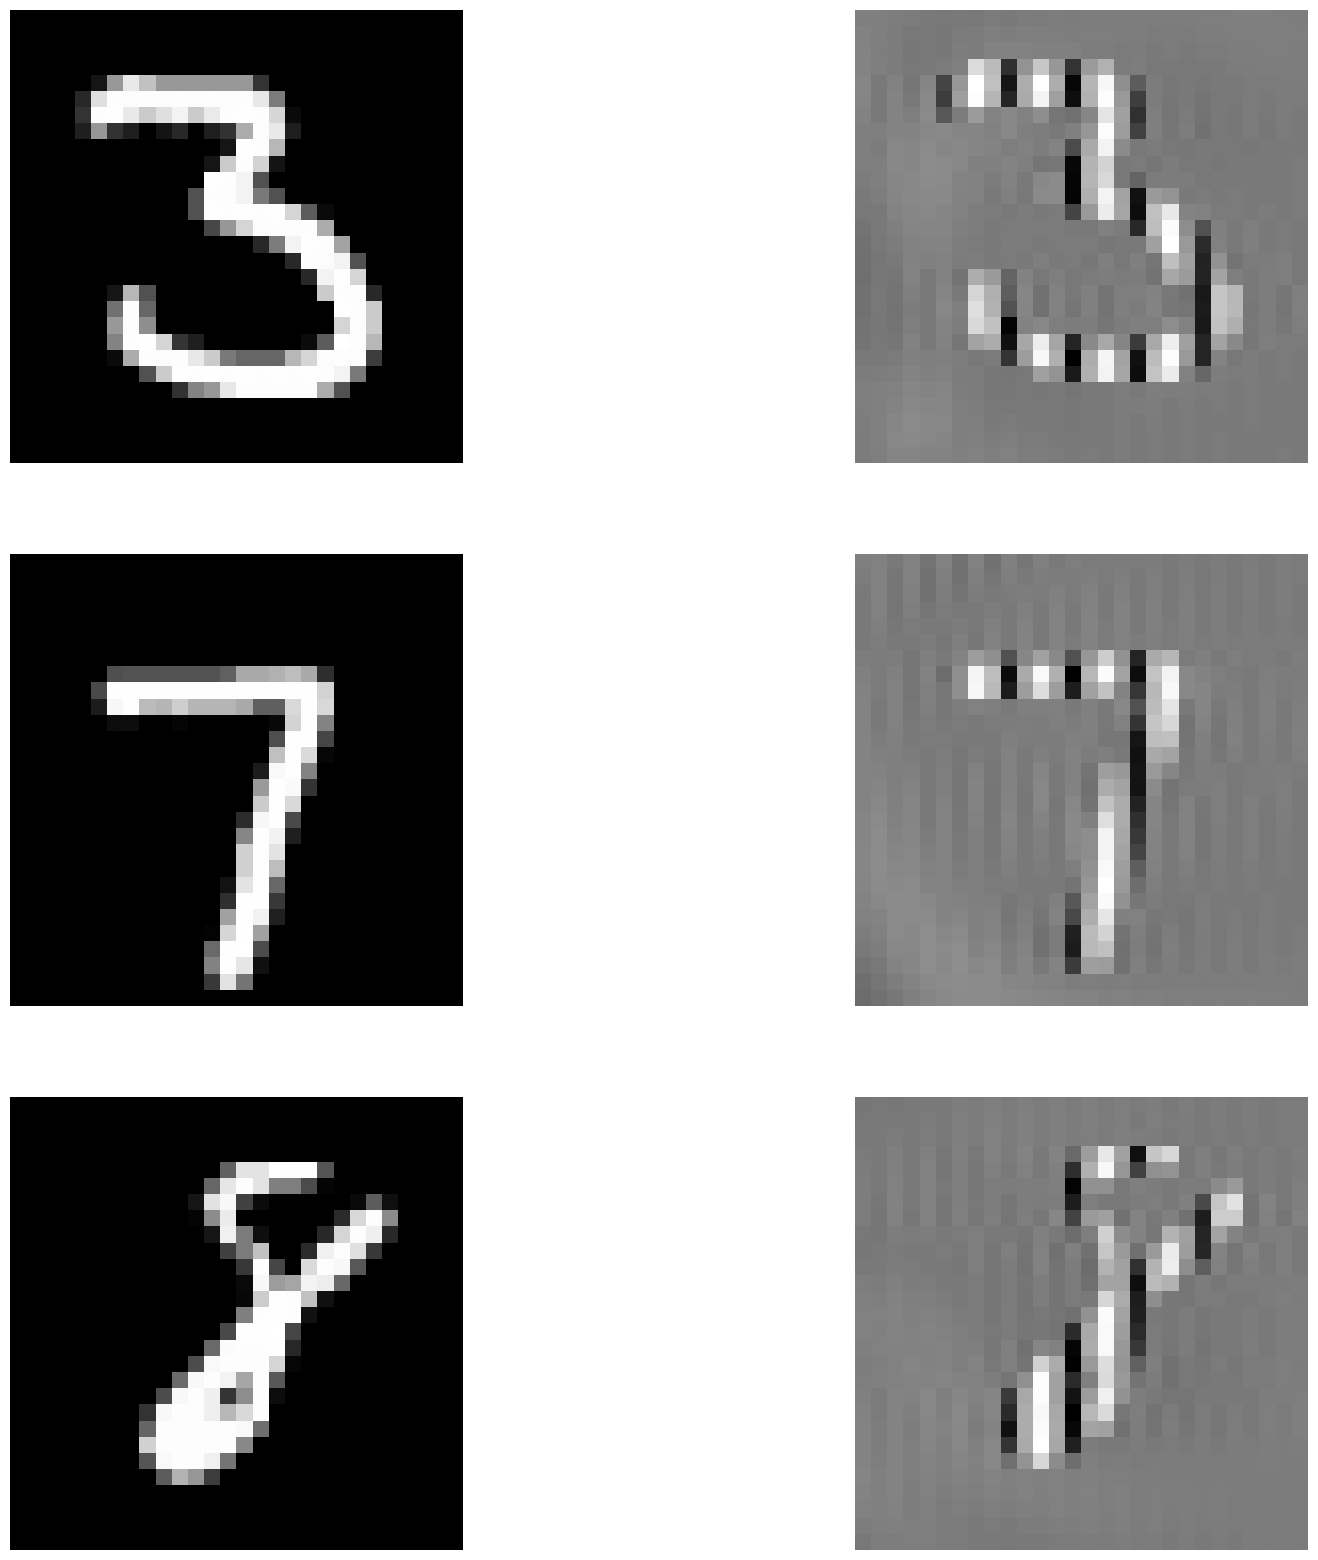

In [29]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.subplot(3,2,1)
plt.imshow(x_test[1840,:,:],cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,2)
plt.imshow(np.abs(g(holo,-d,lam)[493:521,517:545]),cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,3)
plt.imshow(x_test[1919,:,:],cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,4)
plt.imshow(np.abs(g(holo2,-d,lam)[493:521,517:545]),cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,5)
plt.imshow(x_test[2598,:,:],cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,6)
plt.imshow(np.abs(g(holo3,-d,lam)[493:521,517:545]),cmap='gray', aspect='equal')
plt.axis('off')

##Gabor Holography

Gabor proposed inline holography. Typically with weak scattering, the unscattered signal acts as a reference for itself. Gabor holography is off axis holography with a zero degree off set.

The signal obtained by back propagating $g(x)$ is shown in the center of the figure, the detail at right shows the magnitude of reconstructed object at the center of the field. What we are actually observing is the interference between the reconstructed object and digital artifacts of the backpropagated cross terms.

Once again we have assumed that the original object field is a real-valued magnitude.


Text(0, 0.5, 'wavelengths')

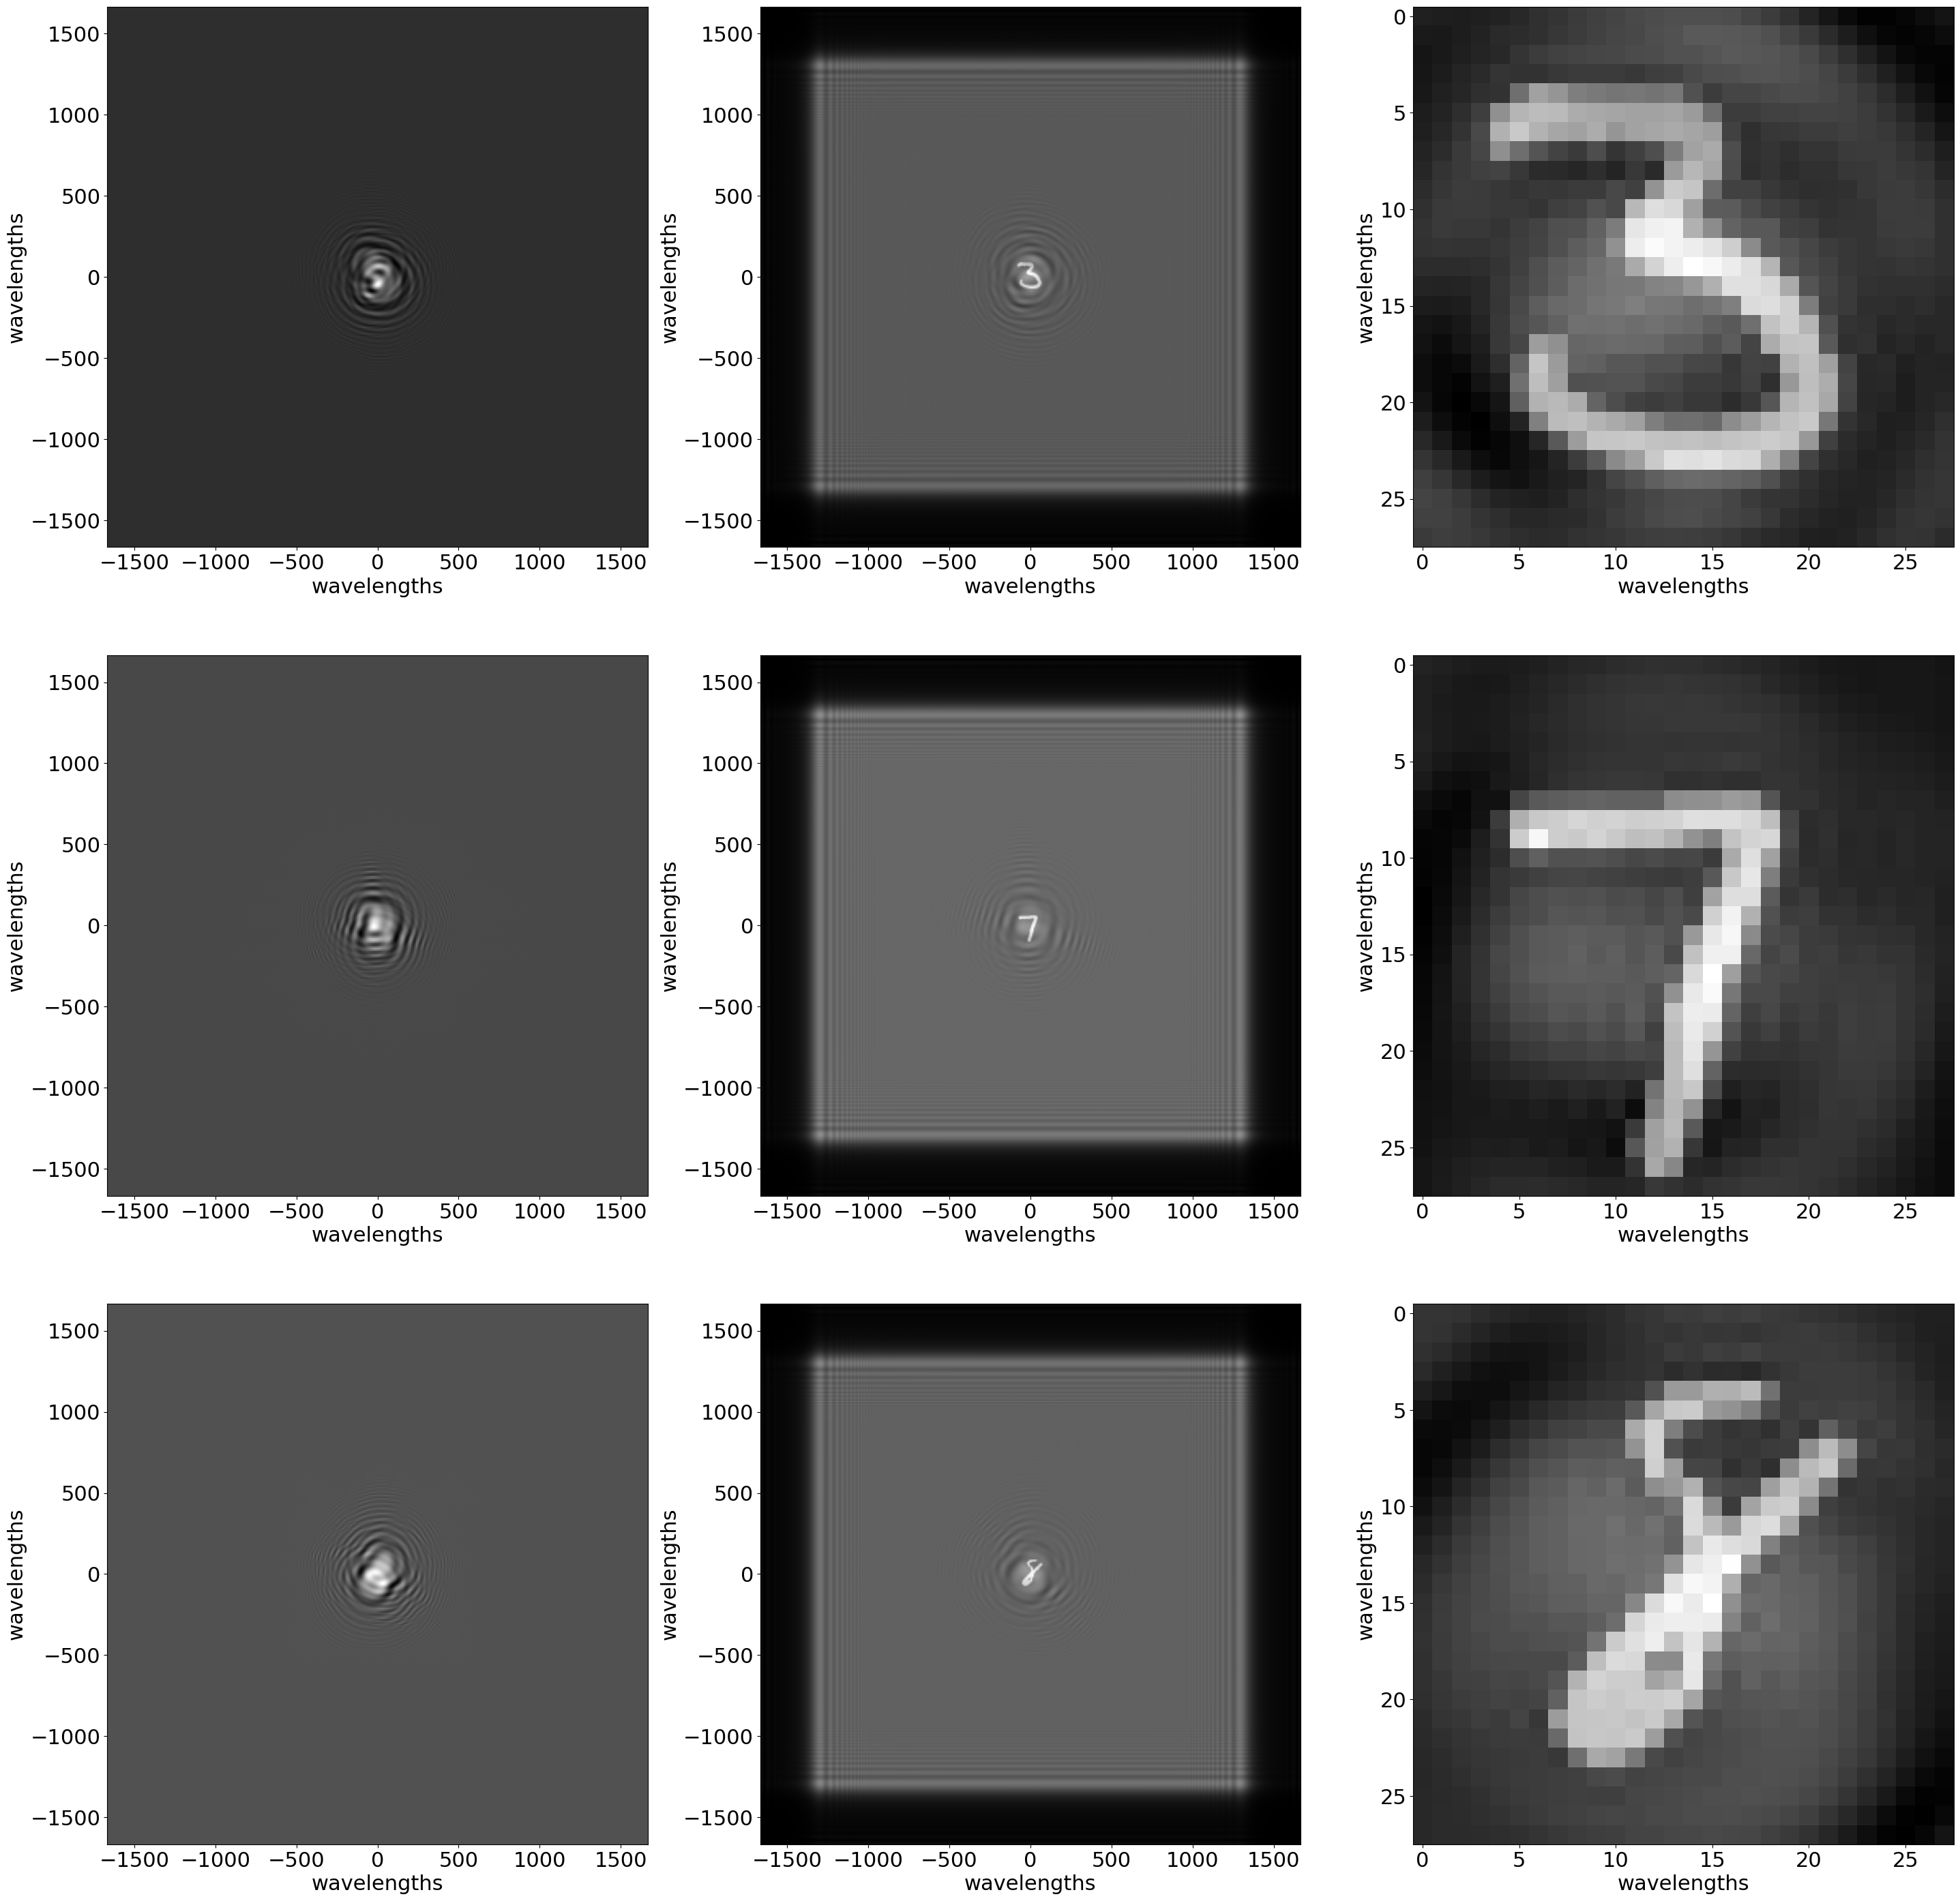

In [44]:
# diffracted field
plt.rcParams['figure.figsize'] = [35, 35]
plt.rcParams.update({'font.size': 22})
r=1
N=256
theta=0
lam=.3 # ratio of wavelength to the sampling period
d=1000 # in units of wavelegnths
f=np.zeros([N,N]).astype('complex128')
# insert the mnist image in the center of the field
f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=x_test[1840,:,:]
q=g(f,d,lam)
xrange=d/(lam*2)
xR=np.linspace(-xrange,xrange,q.shape[0])
xx, yy= np.meshgrid(xR,xR)
holo=np.abs(q +r*np.exp(2*np.pi*1j*xx*np.sin(theta)))**2
plt.subplot(3,3,1)
plt.imshow(holo-r**2,extent=[-xrange,xrange,-xrange,xrange], cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')
plt.subplot(3,3,2)
recon=g(holo,-d,lam)
plt.imshow(np.abs(recon),extent=[-xrange,xrange,-xrange,xrange],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')
plt.subplot(3,3,3)
plt.imshow(np.abs(recon)[188:216,189:217],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')


# insert the mnist image in the center of the field
f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=x_test[1919,:,:]
q2=g(f,d,lam)
xrange=d/(lam*2)
xR=np.linspace(-xrange,xrange,q2.shape[0])
xx, yy= np.meshgrid(xR,xR)
holo2=np.abs(q2 +r*np.exp(2*np.pi*1j*xx*np.sin(theta)))**2
plt.subplot(3,3,4)
plt.imshow(holo2-r**2,extent=[-xrange,xrange,-xrange,xrange], cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')
plt.subplot(3,3,5)
recon=g(holo2,-d,lam)
plt.imshow(np.abs(recon),extent=[-xrange,xrange,-xrange,xrange],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')
plt.subplot(3,3,6)
plt.imshow(np.abs(recon)[188:216,189:217],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')

# insert the mnist image in the center of the field
f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=x_test[2598,:,:]
q3=g(f,d,lam)
xrange=d/(lam*2)
xR=np.linspace(-xrange,xrange,q2.shape[0])
xx, yy= np.meshgrid(xR,xR)
holo3=np.abs(q3 +r*np.exp(2*np.pi*1j*xx*np.sin(theta)))**2
plt.subplot(3,3,7)
plt.imshow(holo3-r**2,extent=[-xrange,xrange,-xrange,xrange], cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')
plt.subplot(3,3,8)
recon=g(holo3,-d,lam)
plt.imshow(np.abs(recon),extent=[-xrange,xrange,-xrange,xrange],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')
plt.subplot(3,3,9)
plt.imshow(np.abs(recon)[188:216,189:217],cmap='gray', aspect='equal')
plt.xlabel('wavelengths')
plt.ylabel('wavelengths')


(-0.5, 27.5, 27.5, -0.5)

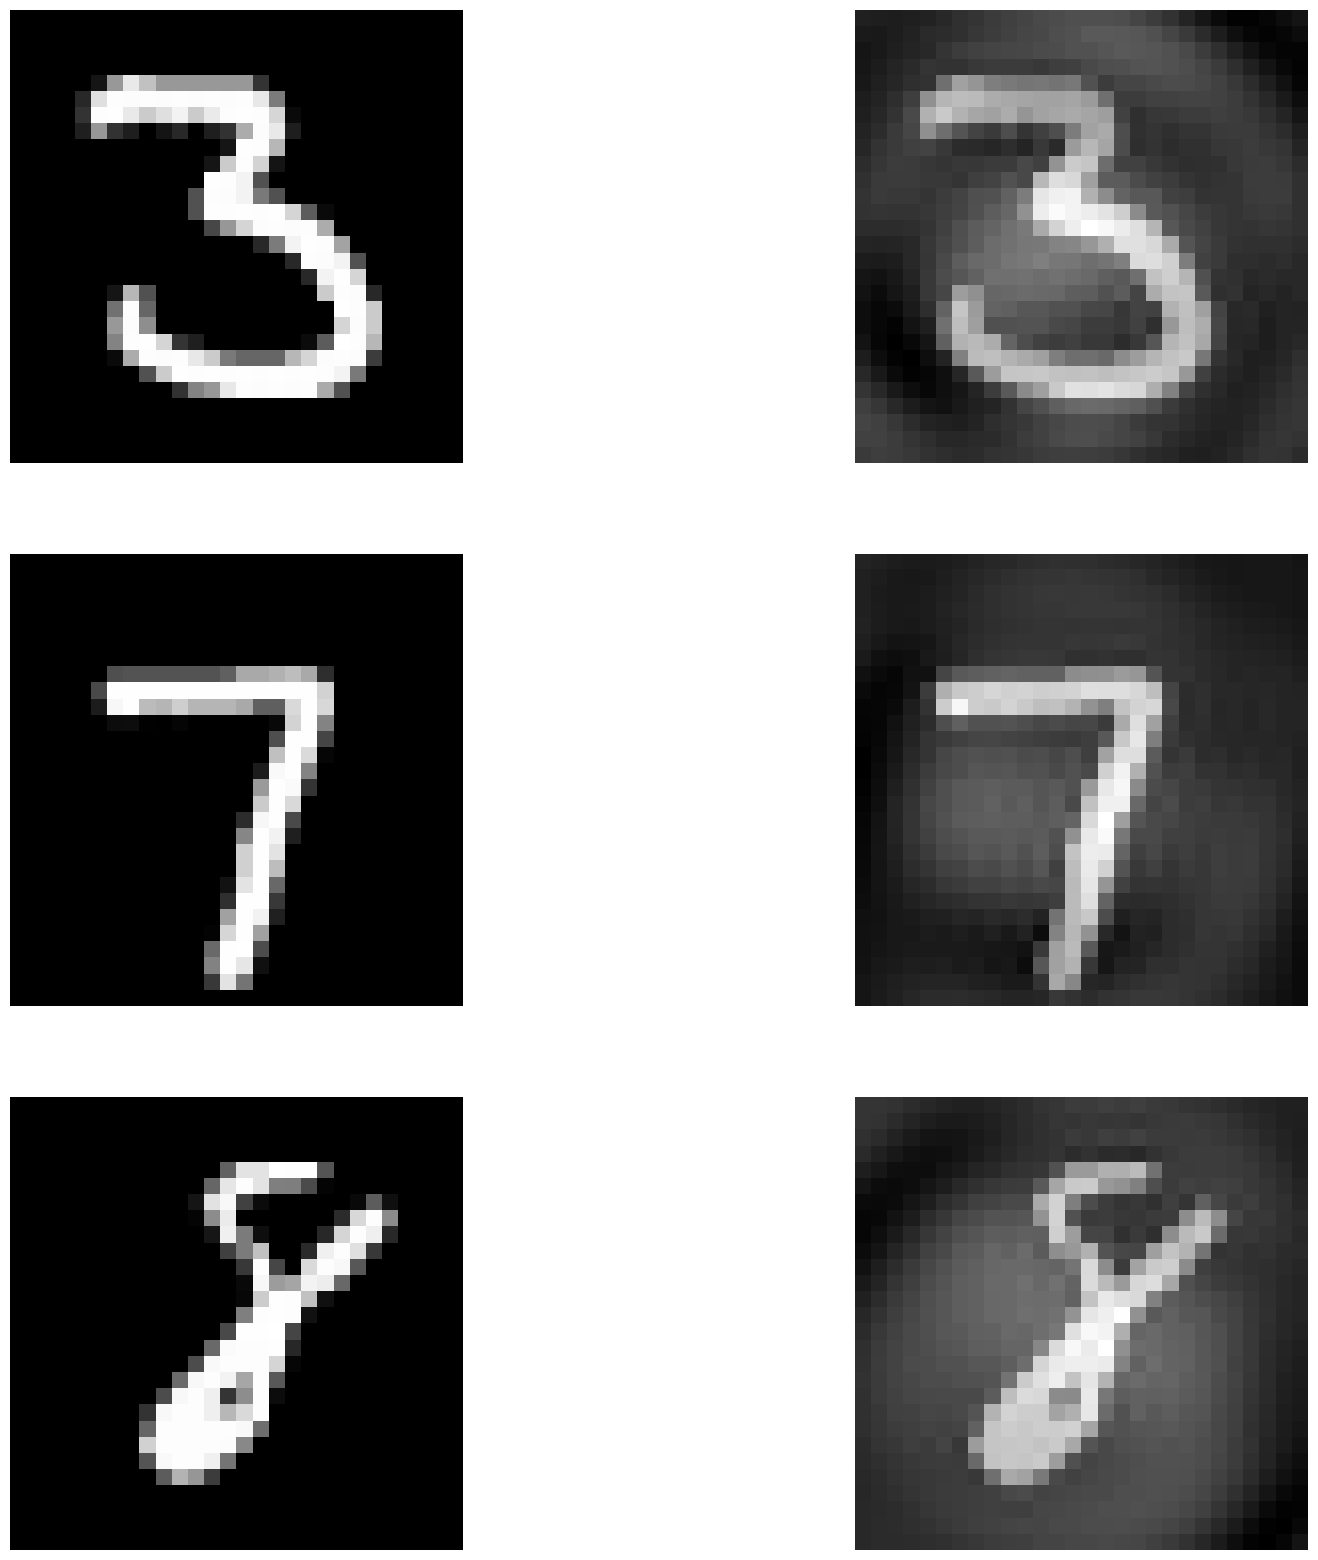

In [45]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.subplot(3,2,1)
plt.imshow(x_test[1840,:,:],cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,2)
plt.imshow(np.abs(g(holo,-d,lam)[188:216,189:217]),cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,3)
plt.imshow(x_test[1919,:,:],cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,4)
plt.imshow(np.abs(g(holo2,-d,lam)[188:216,189:217]),cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,5)
plt.imshow(x_test[2598,:,:],cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,2,6)
plt.imshow(np.abs(g(holo3,-d,lam)[188:216,189:217]),cmap='gray', aspect='equal')
plt.axis('off')

## Phase retrieval


Holography utilizes a reference signal, the Gabor "coherent background." When the reference is sufficiently intense, the measured intensities can be linearly processed to recover the field. In contrast, without the benefit of a reference signal, phase-retrieval requires estimation of the field from a quadratic form

The first row is ground truth.

The second row considers a surface relief hologram. Each object pixel has intensity value 1, but the phase $\phi$. The signal value is $e^{i\phi}$.

The third row, each object pixel has uniformly distributed random phase, which causes the reconstructed image to show speckle.

(-0.5, 27.5, 27.5, -0.5)

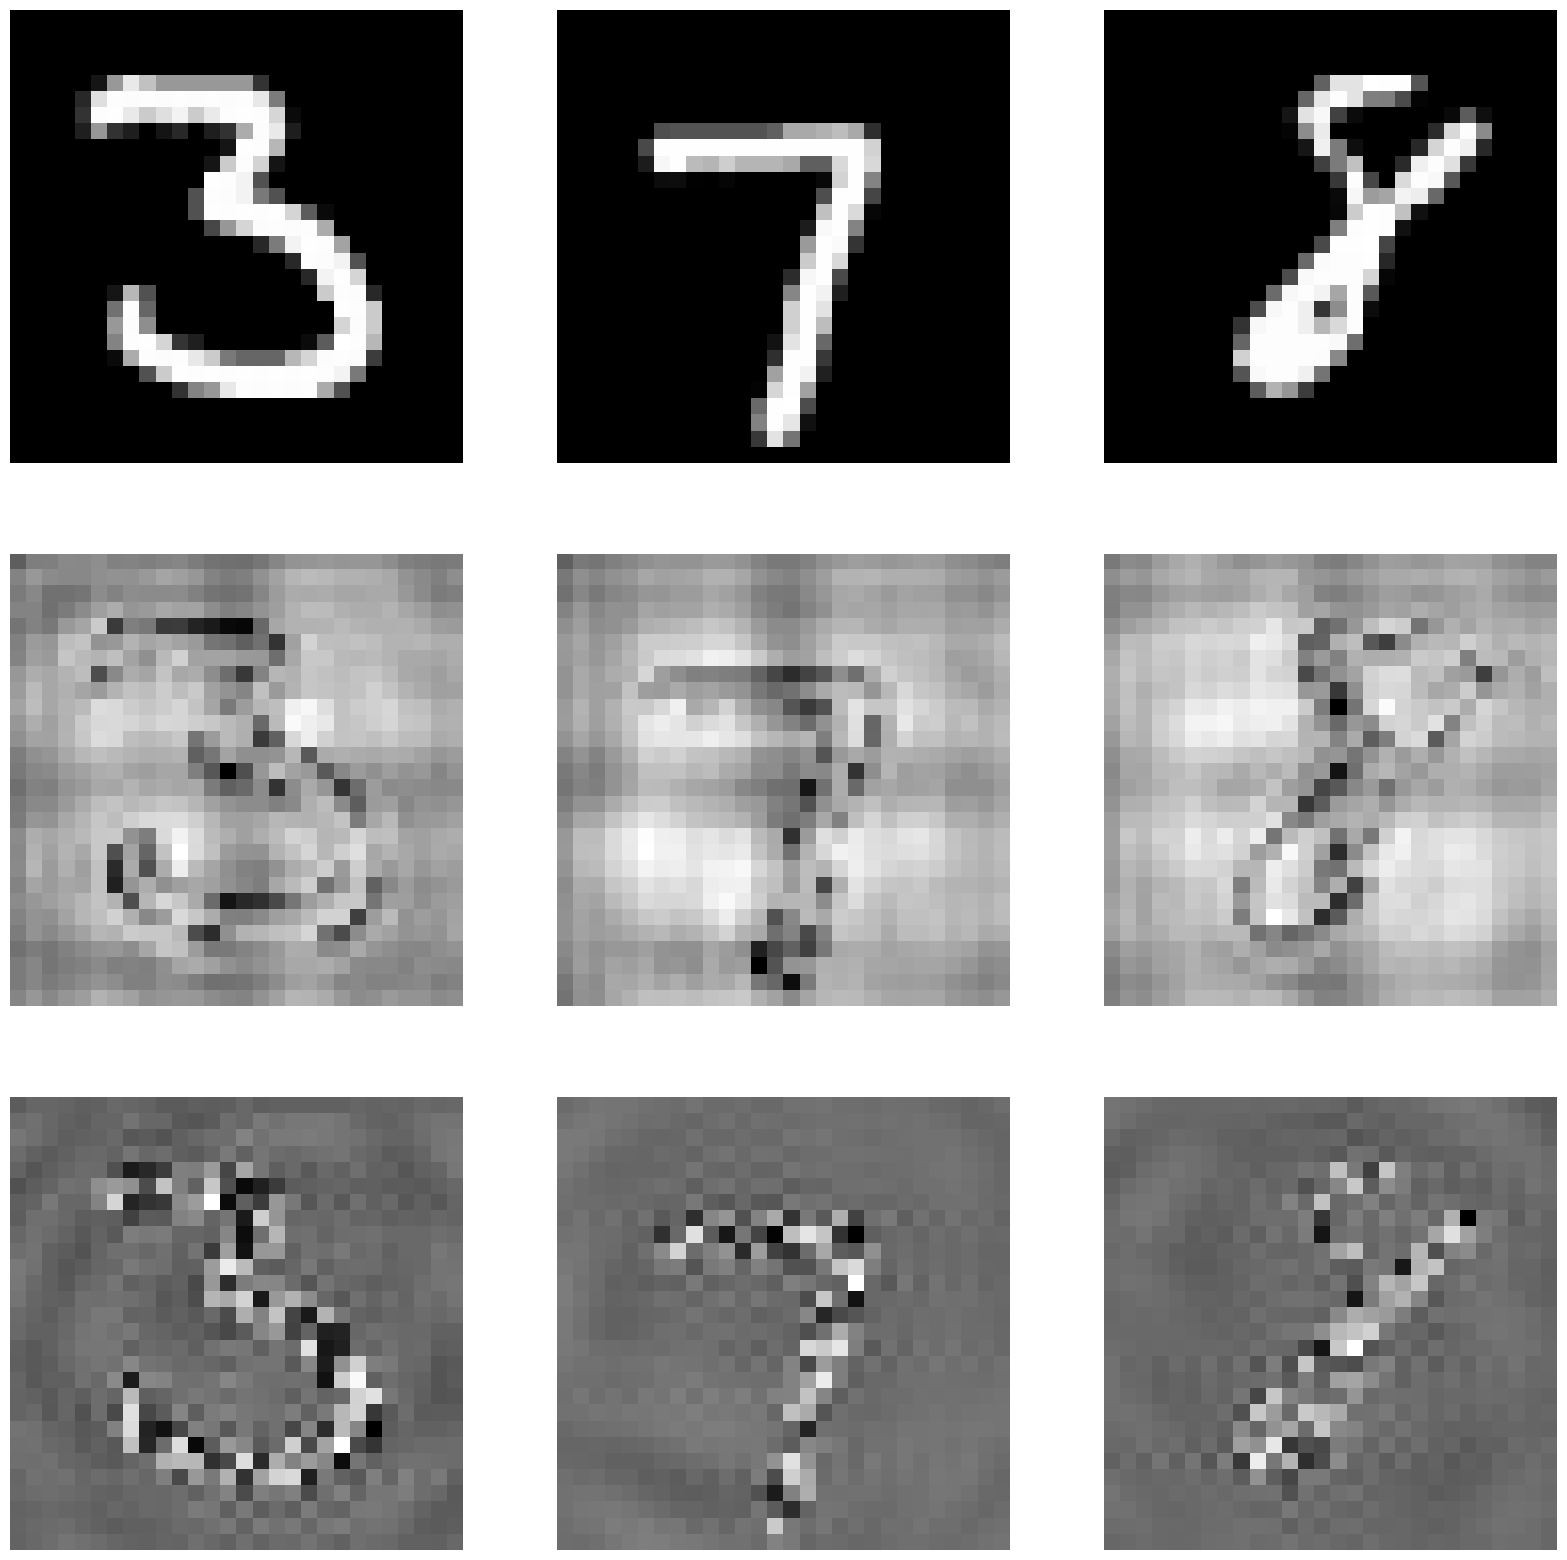

In [56]:
# diffracted field
plt.rcParams['figure.figsize'] = [20, 20]
r=1
N=150
lam=.3 # ratio of wavelength to the sampling period
d=600 # in units of wavelegnths
f=np.zeros([N,N]).astype('complex128')
# insert the mnist image in the center of the field with phase

f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=np.exp(2*np.pi*1j*x_test[1840,:,:])
q=g(f,d,lam)
xrange=d/(lam*2)
xR=np.linspace(-xrange,xrange,q.shape[0])
xx, yy= np.meshgrid(xR,xR)
holo=np.abs(q +r)**2
plt.subplot(3,3,1)
plt.imshow(x_test[1840].reshape(28, 28), cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,3,4)
plt.imshow(np.abs(g(holo,-d,lam))[105:133,105:133],cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,3,7)
# insert the mnist image in the center of the field with random uniform phase
f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=np.exp(2*np.pi*1j*np.random.random((28,28)))*x_test[1840,:,:]
q=g(f,d,lam)
holo=np.abs(q +r)**2
plt.imshow(np.abs(g(holo,-d,lam))[105:133,105:133],cmap='gray', aspect='equal')
plt.axis('off')


f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=np.exp(2*np.pi*1j*x_test[1919,:,:])
q2=g(f,d,lam)
holo2=np.abs(q2 +r)**2
plt.subplot(3,3,2)
plt.imshow(x_test[1919].reshape(28, 28), cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,3,5)
plt.imshow(np.abs(g(holo2,-d,lam))[105:133,105:133],cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,3,8)
# insert the mnist image in the center of the field with random uniform phase
f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=np.exp(2*np.pi*1j*np.random.random((28,28)))*x_test[1919,:,:]
q2=g(f,d,lam)
holo2=np.abs(q2 +r)**2
plt.imshow(np.abs(g(holo2,-d,lam))[105:133,105:133],cmap='gray', aspect='equal')
plt.axis('off')


f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=np.exp(2*np.pi*1j*x_test[2598,:,:])
q3=g(f,d,lam)
holo3=np.abs(q3 +r)**2
plt.subplot(3,3,3)
plt.imshow(x_test[2598].reshape(28, 28), cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,3,6)
plt.imshow(np.abs(g(holo3,-d,lam))[105:133,105:133],cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(3,3,9)
# insert the mnist image in the center of the field with random uniform phase
f[np.int(N/2-14):np.int(N/2+14),np.int(N/2-14):np.int(N/2+14)]=np.exp(2*np.pi*1j*np.random.random((28,28)))*x_test[2598,:,:]
q3=g(f,d,lam)
holo3=np.abs(q3 +r)**2
plt.imshow(np.abs(g(holo3,-d,lam))[105:133,105:133],cmap='gray', aspect='equal')
plt.axis('off')

